# This notebook currently includes sequences of cells that I do not want to run but might want to incorporate later

# sex slang

Note that this is very flawed and I should spot check any results to see if that's actually what they're saying.

In [ ]:
def sex_slang_feature(review):
    if re.search('(cum|cuming|cumming|come|came|cummed|comed|cumed) +(in)', review) or \
    re.search('(he|him|his) +(cum|cuming|cumming|come|came|cummed|comed|cumed)', review):
        return True
    else:
        return False

df['sex_slang'] = df.review_lower.apply(sex_slang_feature)

df.sex_slang.value_counts()

In [ ]:
df[df.review_lower.str.contains('(shot|shoot)(e)?(ing)?(ed)? +(in)')].index[:25]

In [ ]:
def sex_slang_feature(review):
    if re.search('((com+|cum+|cam+|jiz+|shot|shoot)(e)?(ing)?(ed)?) +(in) +(me|my)', review) or \
    re.search('(he|him|his) +(cum|cuming|cumming|come|came|cummed|comed|cumed)', review):
        return True
    else:
        return False

df['sex_slang'] = df.review_lower.apply(sex_slang_feature)

df.sex_slang.value_counts()

In [ ]:
df[df.sex_slang].usefulCount.mean()

In [ ]:
df[~df.sex_slang].usefulCount.mean()

In [ ]:
def sex_slang_feature(review):
    if re.search('ejacul', review):
        return True
    else:
        return False

df['sex_slang'] = df.review_lower.apply(sex_slang_feature)

df.sex_slang.value_counts()

# not sure what this little section is

In [ ]:
# make list of all tweet texts
all_reviews = df.review.to_list()

In [ ]:
# obtain the standard list of stopwords
nltk.download('stopwords', quiet=True)
# start our own list of stopwords with these words
stop_list = stopwords.words('english')
# add to this list some twitter-specific terms
stop_list.extend(['sxsw', 'link', 'rt'])
# add punctuation characters
for char in string.punctuation:
    stop_list.append(char)
# add empty string
stop_list.extend(['', 'ha', 'wa'])

In [ ]:
# a function that takes a list of reviews and 1) tokenizes them, 2) lemmatizes them, and 3) removes stopwords
# this function returns a one-dimensional list of tokens
def make_tokens(reviews):
    # make list of tokens
    tokens = nltk.word_tokenize(','.join(reviews))
    # lemmatize tokens
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    # stop tokens
    tokens_stopped = [word for word in tokens_lemmatized if \
                      word not in stop_list]
    return tokens_stopped

In [ ]:
df['logUsefulCount'] = df.usefulCount.apply(lambda x: np.log(x) if x > 0 else 0)

# rudimentary word cloud maker

In [ ]:
df_bookmark_3 = df.copy()

In [ ]:
df = df[df.condition == 'Birth Control']

def sentiment_fix(rating):
    if rating > 8:
        return 1
    elif rating < 2:
        return 0
    else:
        return None

df['sentiment'] = df.rating.apply(lambda x: sentiment_fix(x))

df_pos = df[df.sentiment == 1]

df_neg = df[df.sentiment == 0]

In [ ]:
# make list of all reviews
reviews_pos = df_pos.review_lower.to_list()
reviews_neg = df_neg.review_lower.to_list()

In [ ]:
# # make tokenizer
# tokenizer = TweetTokenizer(
#     preserve_case=False,
#     strip_handles=True
# )

# create list of tokens from data set
tokens_pos = word_tokenize(','.join(reviews_pos))
tokens_neg = word_tokenize(','.join(reviews_neg))


# tokens = [word for word in tokens]

In [ ]:
# make lemmatizer
lemmatizer = WordNetLemmatizer()

# lemmatize the list of words
tokens_lemmatized_pos = [lemmatizer.lemmatize(word) for word in tokens_pos]
tokens_lemmatized_neg = [lemmatizer.lemmatize(word) for word in tokens_neg]

In [ ]:
# show the most frequently occurring tokens
FreqDist(tokens_lemmatized_pos).most_common(25)

In [ ]:
# show the most frequently occurring tokens
FreqDist(tokens_lemmatized_neg).most_common(25)

In [ ]:
negatives = ['no', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", \
             "isn't", "wasn't", "weren't", "won't", "wouldn't"]

In [ ]:
# obtain the standard list of stopwords
nltk.download('stopwords', quiet=True)
# start our own list of stopwords with these words
stop_list = [word for word in stopwords.words('english') if word not in negatives]
# add punctuation characters
for char in string.punctuation:
    stop_list.append(char)
# add empty string
stop_list.extend(['', 'ha', 'wa'])

In [ ]:
stop_list

In [ ]:
# make stopped list of tokens
tokens_stopped_pos = [word for word in tokens_lemmatized_pos if word not in stop_list]
tokens_stopped_neg = [word for word in tokens_lemmatized_neg if word not in stop_list]

In [ ]:
# show the most frequently occurring tokens
FreqDist(tokens_stopped_pos).most_common(25)

In [ ]:
# show the most frequently occurring tokens
FreqDist(tokens_stopped_neg).most_common(25)

In [ ]:
# word cloud of stopped words
plot_wordcloud(make_wordcloud(tokens_stopped_pos))

In [ ]:
# word cloud of stopped words
plot_wordcloud(make_wordcloud(tokens_stopped_neg, colormap='Reds'))

In [ ]:
df.groupby('rating').usefulCount.median()

In [ ]:
len(df)

In [ ]:
df_bookmark_4 = df.copy()

In [ ]:
# df = df_bookmark_4.copy()

# rudimentary modeling attempts

BEFORE the train-test split, I need to establish the final version of my X and y. I can vectorize the text feature AFTER the train-test split, but that part is going to be the same either way, so I might as well do that BEFORE. And I also want to add engineered features, which will not factor into the vectorization.

This also means that I need to settle on stop words, etc. BEFORE I vectorize, BEFORE I add engineered features, BEFORE I train-test split. Perhaps this could all be customized within various models later, but I don't know how to incorporate all of those steps into a pipeline.

Well, now I'm seeing that many options are possible, but 

Also, I need to establish target values dependent on my choice of thresholds for determining "useful" v. "not useful". This needs to happend before the train-test split.

- establish one df with a binary (?) target

In [195]:
useful_threshold = [3, 10]

df.drop(df[
    (df.usefulCount > useful_threshold[0]) & \
    (df.usefulCount < useful_threshold[1])
].index, inplace=True)

df['target'] = df.usefulCount.apply(lambda x: 1 if x >= useful_threshold[1] else 0)

In [ ]:
df.target.value_counts()

- establish stop list

In [ ]:
# obtain the standard list of stopwords
nltk.download('stopwords', quiet=True)
# start our own list of stopwords with these words
stop_list = stopwords.words('english')
# add punctuation characters
for char in string.punctuation:
    stop_list.append(char)
# add empty string
stop_list.extend([''])

- establish function that tokenizes, removes stop words, lemmatizes, and performs any other necessary operations

In [ ]:
# make tokenizer
def custom_tokenize(document):
    
    # shift everything to lower case
    document = document.lower()

    # create list of tokens from data set
    tokens = nltk.tokenize.word_tokenize(document, language='english', preserve_line=False)
    
    # remove stop words
    tokens = [word for word in tokens if not word in stop_list]

    # instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    # lemmatize the list of words
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens_lemmatized

- train test split

## Train and test sets

We'll split the data into train and test sets.

In [ ]:
# split the data into target (sentiment) and predictor (text)
X, y = df['review'], df['target']

# split the data into train and test sets
# set random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

- follow modeling examples, pipeline, etc.

## Results function

We'll create a function that takes the pipeline we've created and displays only the results we're interested in.

In [ ]:
def model_results(pipeline):
    # fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    # generate predictions for the test data
    y_pred = pipeline.predict(X_test)
    # display the training and test accuracy scores
    print(f"Training Score: {round(pipeline.score(X_train, y_train),4)} \
    \nTest Score:     {round(pipeline.score(X_test, y_test),4)}")
    
    # plot the normalized confusion matrix
    plot_confusion_matrix(estimator=pipeline, X=X_test, y_true=y_test, cmap='Greens', 
                          normalize='true', 
                          display_labels=['Non-positive', 'Positive'])

## Naive Bayes (BASELINE MODEL)
### Rough model

In [ ]:
# Multinomial Naive Bayes

# create pipeline
pipeline_nb = Pipeline([
    # set vectorizer
    ('vectorizer', TfidfVectorizer(
        tokenizer = custom_tokenize,
        stop_words = stop_list
    )),
    # set classifier
    ('clf', MultinomialNB())
])
print('Naive Bayes')
# create model from pipeline and display results
model_results(pipeline_nb)

In [248]:
#defining a function to extract and plot feature importances from best models
import math
import seaborn as sns
def plot_feature_importance(clf_pipe, n_features, title):
    """Function extracts classifier feature importances from a given pipeline object
    and displays top n_features. 
    -------------------------------
    Arguments:
    clf_pipe: Pipeline object that contains the classifier. Feature importances will be
    extracted from this pipeline's classifier.
    n_features: top number of features to be plotted
    title: title information for axes containing name of type of model"""
    #extracting feature importance information from pipeline
#     feature_names = clf_pipe['preprocessor'].get_feature_names()
#     coefs = clf_pipe['clf'].coef_[0]
    
    feature_names = pipeline.named_steps['preprocessor'].named_transformers_['text'].get_feature_names() + engineered_features

    coefs = model.coef_.toarray().flatten()  # Assuming linear kernel and using a sparse matrix
    
    #parsing information to df
    importance_df = pd.DataFrame(feature_names, columns=['Word'])
    importance_df['Importance'] = math.e**(abs(coefs))
    importance_df['Coefficient'] = coefs

    #sorting to find top n_features
    feature_importance = importance_df.sort_values(by = ["Importance"], 
                                                   ascending=False).head(n_features)
    
    #plotting coefficients
    fig, ax = plt.subplots(figsize=(15,10), ncols=2)
    ax[0].set_title(f'Coefficients for {title}')
    ax[0].set_ylabel('Word')
    ax[0].set_xlabel('Coefficient')
    sns.barplot(x='Coefficient', y='Word', data=feature_importance, 
                palette='coolwarm', ax=ax[0])
    #plotting feature importances
    ax[1].set_title(f'Feature Importances for {title}')
    ax[1].set_ylabel('Word')
    ax[1].set_xlabel('Importance')
    sns.barplot(x='Importance', y='Word', data=feature_importance, 
                palette='coolwarm', ax=ax[1])
    plt.tight_layout();

### Feature Importances - Tuned Logistic Regression Model

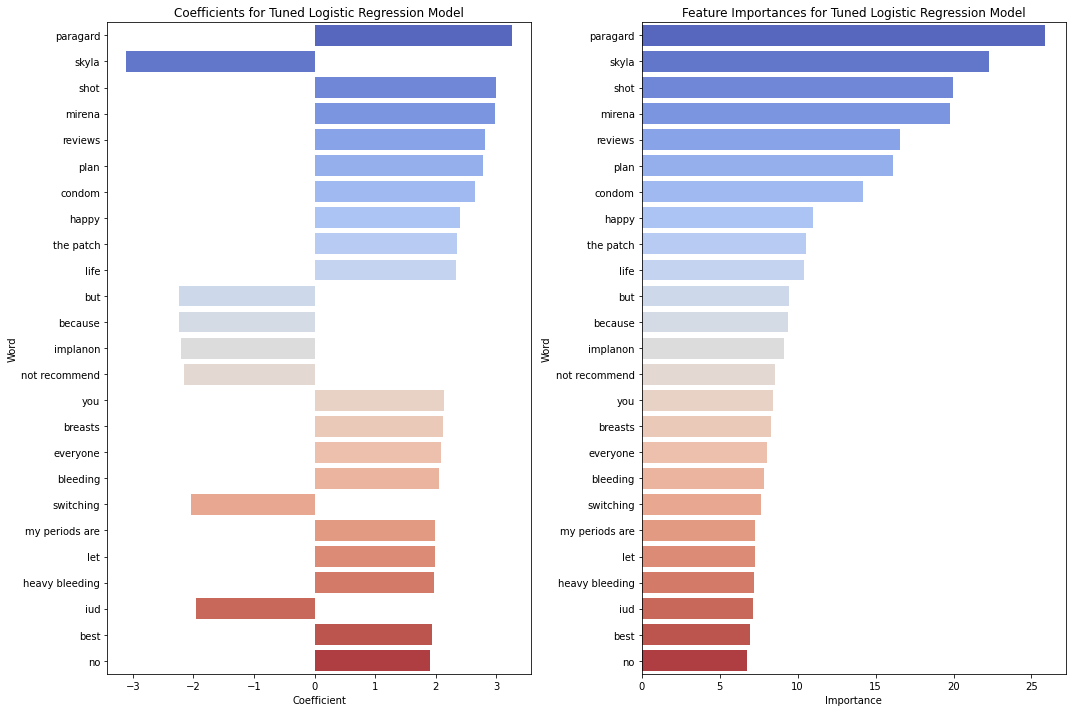

In [249]:
plot_feature_importance(pipeline, 25, 'Tuned Logistic Regression Model')

# importing code from chat gpt

Adjustments:
- replace "text_column" with "review_lower"
- replace numerical columns with a list
- adjust stop words
- choose ngram range

The code below is the best working version of the chat gpt code I've found to run the model.

I may wish to spend some time editing this down to something sleeker? Or something more similar to the version I cribbed previously for the apple tweets project.

The challenge has been to pair the code below with a way to display the feature importances.

At this point I have only been able to generate the coefficients when SVC uses a "linear kernel". When I toggled this feature to "linear", I also added "probability=True", and that may have been responsible for the code taking an especially long time to run.

Perhaps I can remove the probability part. In any case, there should be a way to make this all run more smoothly and faster so that I can substitute other models easily.

In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC  # Use the model of your choice

# Assume df is your pandas DataFrame with 'text_column', 'numerical_column_1', 'numerical_column_2', and 'target_column'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['review'] + engineered_features], df['target'], test_size=0.2, random_state=SEED)

# Define the preprocessing steps
text_preprocessor = TfidfVectorizer(max_features=1000, stop_words=None, ngram_range=(1, 4))
numerical_preprocessor = StandardScaler()

# Create a column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, 'review'),
        ('numerical', numerical_preprocessor, engineered_features)
    ]
)

# Create a pipeline with the preprocessing steps and the model
model = SVC(kernel='linear', probability=True)  # Replace with your model of choice
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit and evaluate the pipeline
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 65.34%


In [199]:
y_test.value_counts(normalize=True)

target
0    0.607856
1    0.392144
Name: proportion, dtype: float64

In [224]:
text_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['text'].get_feature_names()

In [221]:
column_transformer_name

'preprocessor'

In [241]:
feature_names = pipeline.named_steps['preprocessor'].named_transformers_['text'].get_feature_names() + engineered_features
# Extract coefficients from the linear SVM model
coefficients = model.coef_.toarray().flatten()  # Assuming linear kernel and using a sparse matrix

# Create a DataFrame to display the top features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_features = feature_importance_df.sort_values(by='Coefficient', key=abs, ascending=False).head(25)

print(top_features[:10])


       Feature  Coefficient
660   paragard     3.254091
739      skyla    -3.104958
728       shot     2.995566
531     mirena     2.985670
712    reviews     2.807534
680       plan     2.779612
188     condom     2.653027
358      happy     2.398882
826  the patch     2.352442
490       life     2.340001


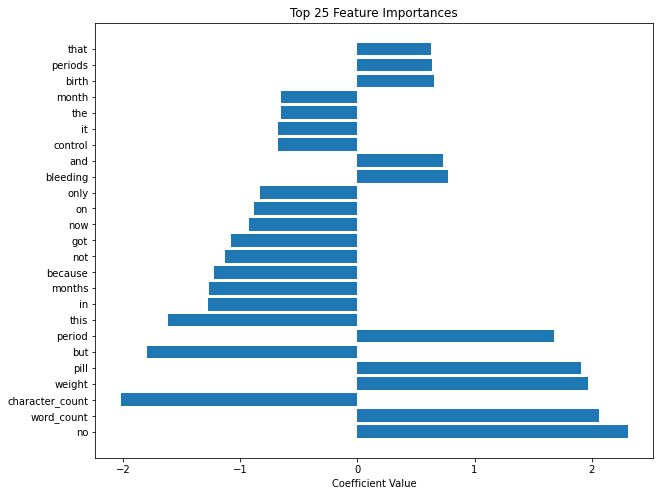

In [43]:

# Sort and display the top features
top_features = feature_importance_df.sort_values(by='Coefficient', key=abs, ascending=False).head(25)

# Plot the top features
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top 25 Feature Importances')
plt.show()

# end